In [1]:
import numpy as np
import matplotlib.pyplot as plt
'''pip install qutip'''
from qutip import *
from qutip.qip.pulse import Pulse
from qutip.qip.device import Processor

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-008383614460>:10: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  Hadamard = snot()
<ipython-input-2-008383614460>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


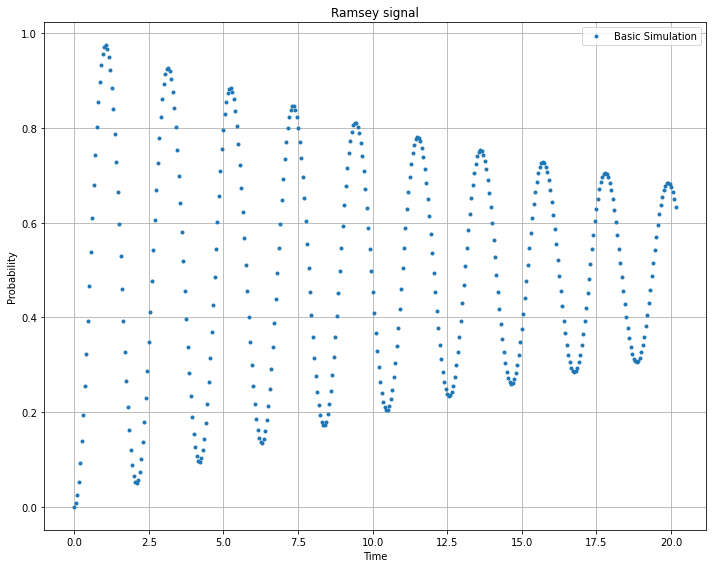

In [2]:
#Basic Simulation: Two energy level, ideal preparation, set predefined t1 and t2
Alpha = np.sqrt(1 / 2)
Beta = np.sqrt(1 / 2)

'''Annihilation Operator'''
a = destroy(2)
'''Generation Operator (also a_dagger = a.dag())'''
a_dagger = create(2)
'''Hadamard Gate'''
Hadamard = snot()

M_zero = basis(2, 0)
M_one = basis(2, 1)
initial = (Alpha*M_zero + Beta*M_one).unit()

tlist = np.arange(0.00, 20.2, 0.05)
processor = Processor(1, t1 = 40, t2 = 20)
processor.add_control(3 * (a_dagger * a + 1/2))
processor.pulses[0].coeff = np.ones(len(tlist) - 1)
processor.pulses[0].tlist = tlist
result = processor.run_state(initial, e_ops=[a_dagger*a, Hadamard*a_dagger*a*Hadamard])

fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(tlist, result.expect[1], '.', label="Basic Simulation")
ax.set_xlabel("Time")
ax.set_ylabel("Probability")
ax.legend()
ax.set_title("Ramsey signal")
ax.grid()
fig.tight_layout()
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


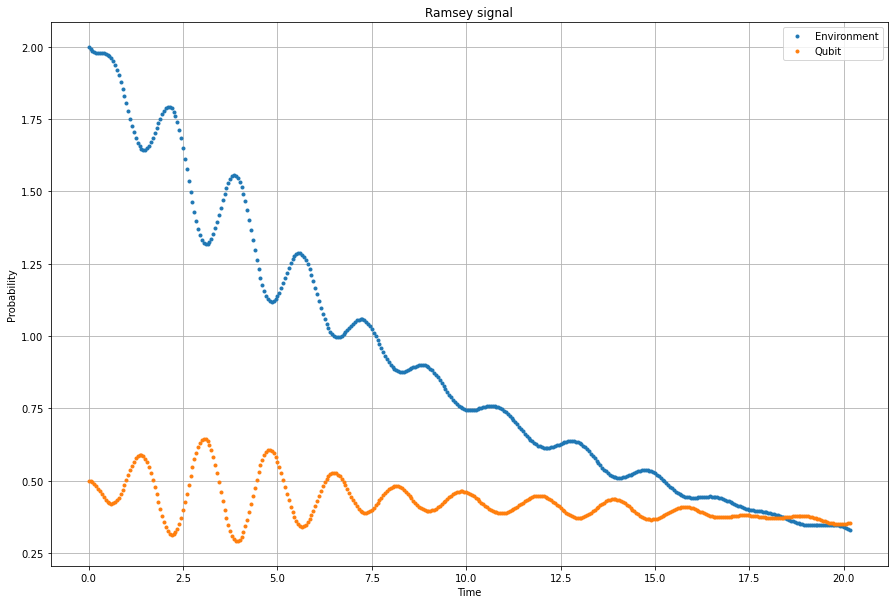

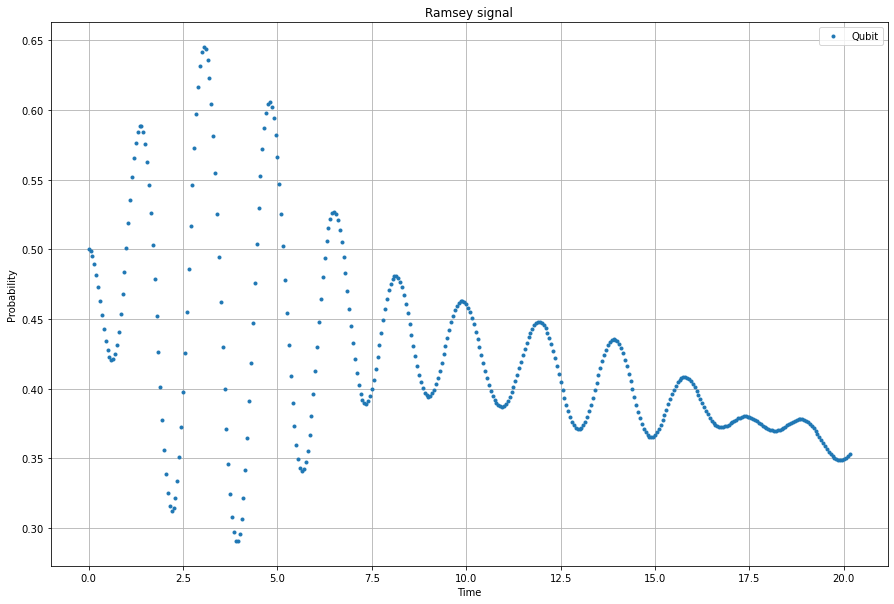

In [3]:
#Basic Simulation: Two energy level, ideal preparation, using collapse operator 
#to describe decoherence noise from environment (modeled as environment = basis(10, 2))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))

Alpha = np.sqrt(1 / 2)
Beta = np.sqrt(1 / 2)
M_zero = basis(2, 0)
M_one = basis(2, 1)
initial = (Alpha*M_zero + Beta*M_one).unit()
environment = basis(10, 2)
initial = tensor(initial, environment)

'''Energy for both part and the interaction'''
H = 3 * (a.dag() * a + 1 / 2) + sm.dag() * sm + (sm * a.dag() + sm.dag() * a)
tlist = np.arange(0.00, 20.2, 0.05)
'''Not quite understand the meaning of collapse operators'''
result = mesolve(H, initial, tlist, [np.sqrt(0.1)*a], [a.dag()*a, sm.dag()*sm])
plt.figure(figsize = (15, 10))
plt.plot(tlist, result.expect[0], '.')
plt.plot(tlist, result.expect[1], '.')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title("Ramsey signal")
plt.grid()
plt.legend(("Environment", "Qubit"))
plt.show()

plt.figure(figsize = (15, 10))
plt.plot(tlist, result.expect[1], '.')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title("Ramsey signal")
plt.grid()
plt.legend(("Qubit",))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[ 0.70784916]
 [-0.69741128]
 [ 0.        ]
 [ 0.11210296]
 [ 0.        ]
 [ 0.        ]]


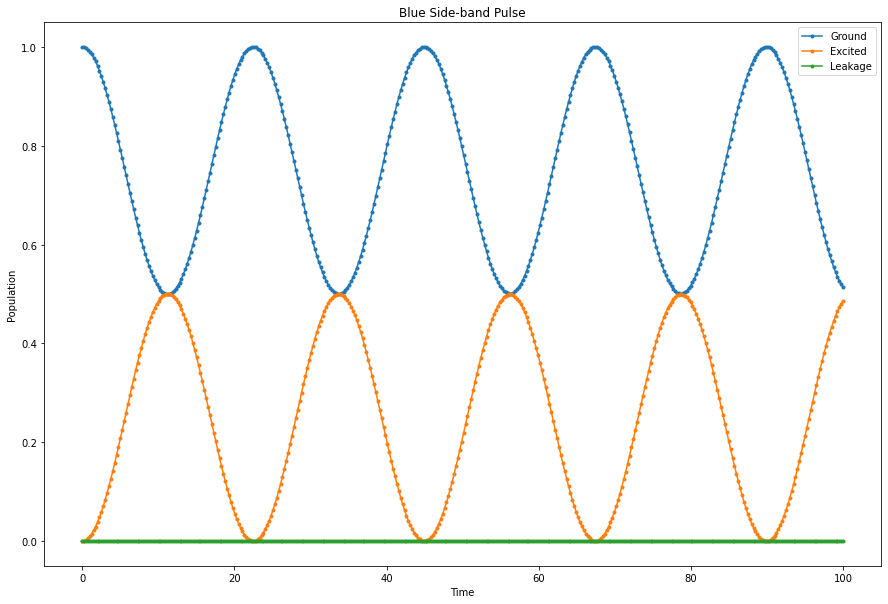

In [4]:
#Considering the pulse for Blue sideband
import cmath
Ohm_n_plus_n = 100
ohm = 0.1
#Treat 20MHz as reference
Nstates = 3
internal = np.sqrt(1/2) * basis(2, 0) + np.sqrt(1/2) * basis(2, 1)
oscillation = basis(Nstates, 0)
psi0 = tensor(internal, oscillation)

'''Sigma-Z, sigmaz(). Sigma plus, sigmap(). Sigma minus, sigmam()'''
a = tensor(qeye(2), destroy(Nstates))
a_dagger = tensor(qeye(2), create(Nstates))
sigmaZ = tensor(sigmaz(), qeye(Nstates))
sigmaP = tensor(sigmap(), qeye(Nstates))
sigmaM = tensor(sigmam(), qeye(Nstates))

H_0 = 2*np.pi*(a_dagger * a) + 0.5*2*np.pi*(sigmaZ)
H_blue = 0.5*Ohm_n_plus_n*(a_dagger * sigmaP - a * sigmaM)*cmath.sqrt(-1)
H = [H_blue]
tg = 100
t_list = np.linspace(0, tg, 400)
output = mesolve(H, psi0, t_list, [])

ground = tensor(qeye(2), basis(Nstates, 0))
excited = tensor(qeye(2), basis(Nstates, 1))
leakage = tensor(qeye(2), basis(Nstates, 2))

state0 = ground * ground.dag()
state1 = excited * excited.dag()
state2 = leakage * leakage.dag()
result0 = expect(state0, output.states)
result1 = expect(state1, output.states)
result2 = expect(state2, output.states)
plt.figure(figsize=(15,10))
plt.plot(t_list,result0,marker = '.',label = 'Ground')
plt.plot(t_list,result1,marker = '.',label = 'Excited')
plt.plot(t_list,result2,marker = '.',label = 'Leakage')
plt.title('Blue Side-band Pulse')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
print(output.states[0])
print(output.states[-1])

Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[ 0.70784916]
 [-0.69741128]
 [ 0.        ]
 [ 0.11210296]
 [ 0.        ]
 [ 0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


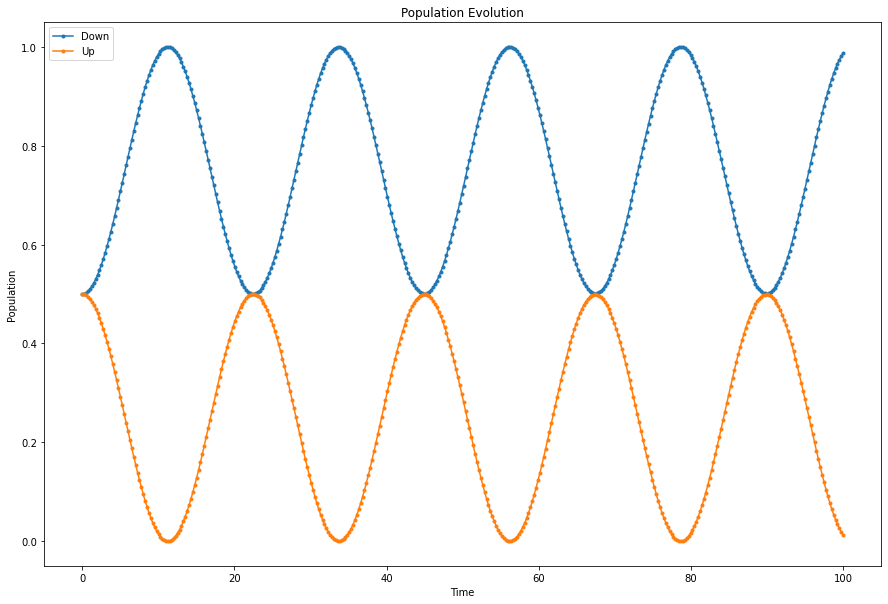

In [5]:
ground = tensor(basis(2, 0), qeye(Nstates))
excited = tensor(basis(2, 1), qeye(Nstates))

state0 = ground * ground.dag()
state1 = excited * excited.dag()
result0 = expect(state0, output.states)
result1 = expect(state1, output.states)
plt.figure(figsize=(15,10))
plt.plot(t_list,result0,marker = '.',label = 'Down')
plt.plot(t_list,result1,marker = '.',label = 'Up')
plt.title('Population Evolution')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
print(output.states[0])
print(output.states[-1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[ 0.71459319]
 [-0.6993633 ]
 [ 0.        ]
 [ 0.01573369]
 [ 0.        ]
 [ 0.        ]]


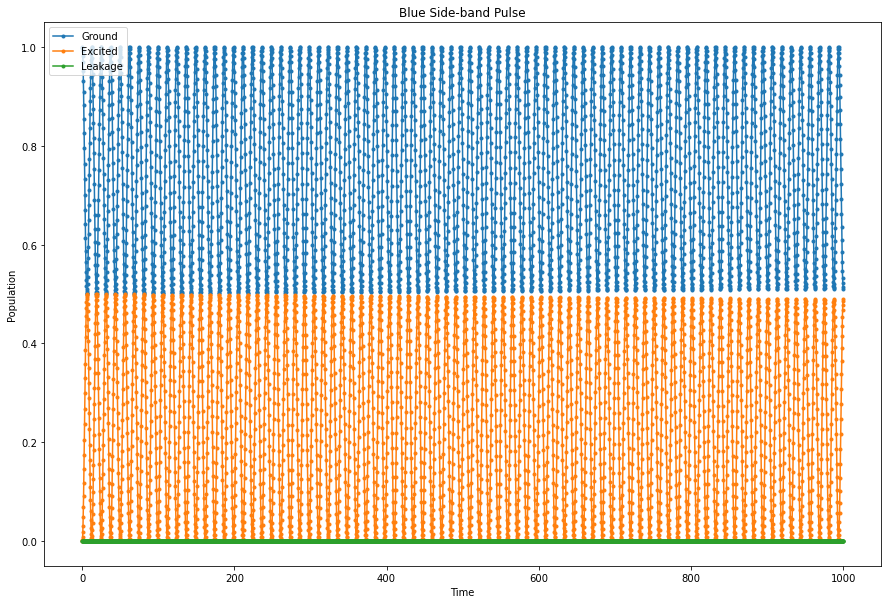

In [6]:
#Considering the pulse for Blue sideband
import cmath
Ohm_n_plus_n = 100
ohm = 0.1
#Treat 20MHz as reference
Nstates = 3
internal = np.sqrt(1/2) * basis(2, 0) + np.sqrt(1/2) * basis(2, 1)
oscillation = basis(Nstates, 0)
psi0 = tensor(internal, oscillation)

'''Sigma-Z, sigmaz(). Sigma plus, sigmap(). Sigma minus, sigmam()'''
a = tensor(qeye(2), destroy(Nstates))
a_dagger = tensor(qeye(2), create(Nstates))
sigmaZ = tensor(sigmaz(), qeye(Nstates))
sigmaP = tensor(sigmap(), qeye(Nstates))
sigmaM = tensor(sigmam(), qeye(Nstates))

H_0 = 2*np.pi*(a_dagger * a) + 0.5*2*np.pi*(sigmaZ)
H_blue = 0.5*Ohm_n_plus_n*(a_dagger * sigmaP - a * sigmaM)*cmath.sqrt(-1)
H = [H_blue]
tg = 1000
t_list = np.linspace(0, tg, 4000)
output = mesolve(H, psi0, t_list, [])

ground = tensor(qeye(2), basis(Nstates, 0))
excited = tensor(qeye(2), basis(Nstates, 1))
leakage = tensor(qeye(2), basis(Nstates, 2))

state0 = ground * ground.dag()
state1 = excited * excited.dag()
state2 = leakage * leakage.dag()
result0 = expect(state0, output.states)
result1 = expect(state1, output.states)
result2 = expect(state2, output.states)
'''
Possible reasons for this result:
1. leakage
2. calculation error
'''
plt.figure(figsize=(15,10))
plt.plot(t_list,result0,marker = '.',label = 'Ground')
plt.plot(t_list,result1,marker = '.',label = 'Excited')
plt.plot(t_list,result2,marker = '.',label = 'Leakage')
plt.title('Blue Side-band Pulse')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
print(output.states[0])
print(output.states[-1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


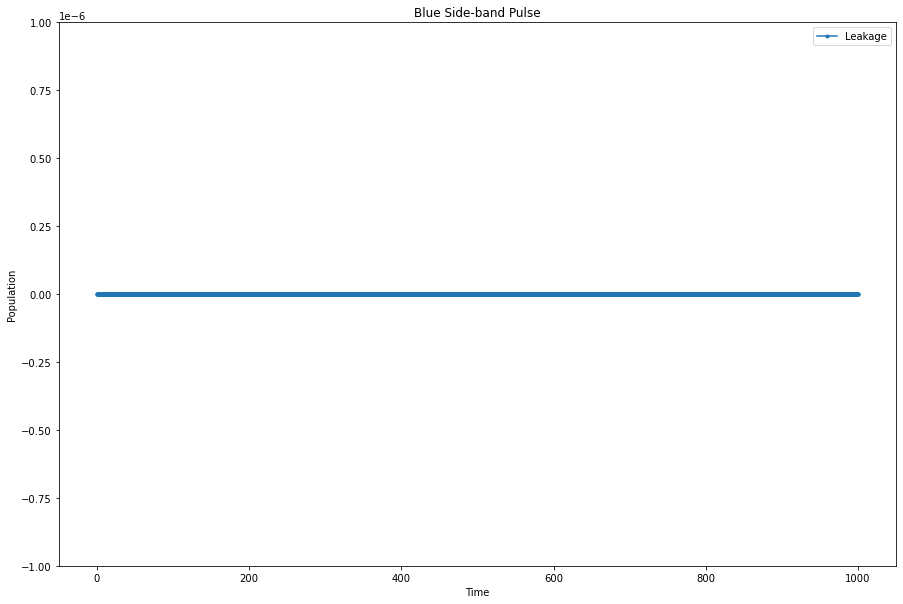

In [7]:
plt.figure(figsize=(15,10))
plt.plot(t_list,result2,marker = '.',label = 'Leakage')
plt.title('Blue Side-band Pulse')
plt.ylim(-0.000001,0.000001)
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


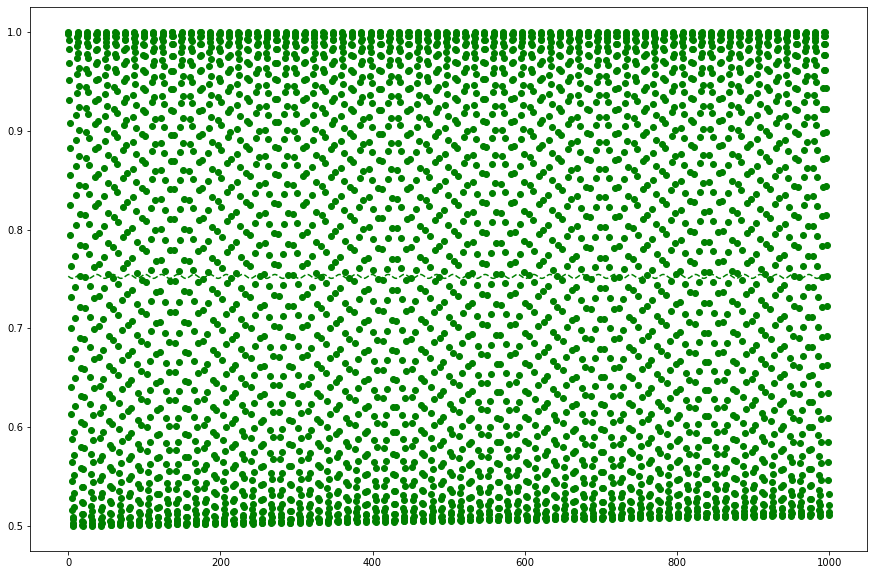

[1.97839853e-03 3.80445783e+02 2.95394060e-01 3.06225602e+00]


In [8]:
import scipy.optimize as fitter

def fitting_sin(x, A, B, ohm, phase):
    return (A * (np.sin(ohm * x + phase) + B))

'''Note: this fitting is quite sensitive to initial values'''
par0 = np.array([0.25,3,0.3,0.4])
par, cov = fitter.curve_fit(fitting_sin, t_list, result0, par0)
fit_y = fitting_sin(t_list, *par)
plt.figure(figsize = (15, 10))
plt.scatter(t_list, result0, color='g')
plt.plot(t_list, fit_y, 'g--')
plt.show()
print(par)

Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70725327]
 [0.5848971 ]
 [0.        ]
 [0.39709973]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70725327]
 [0.5848971 ]
 [0.        ]
 [0.39709973]
 [0.        ]
 [0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


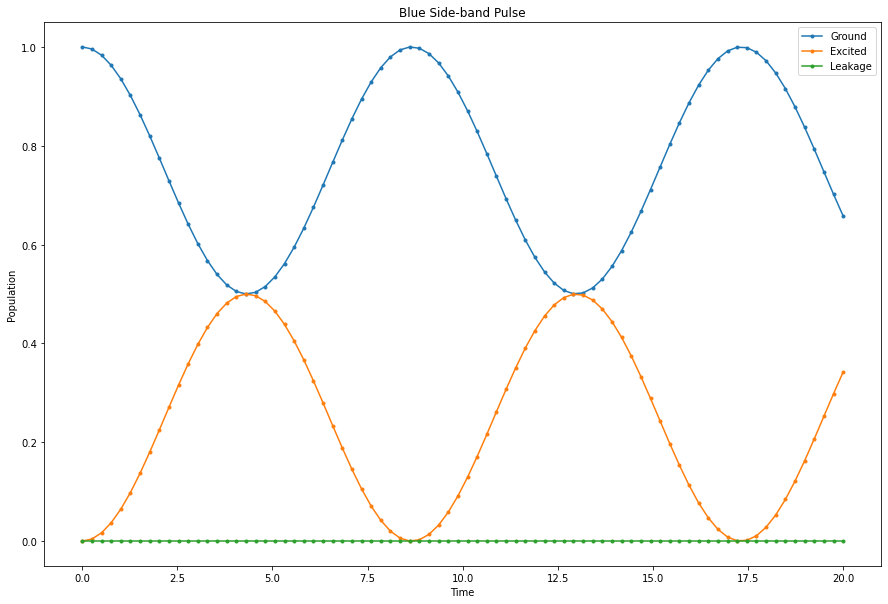

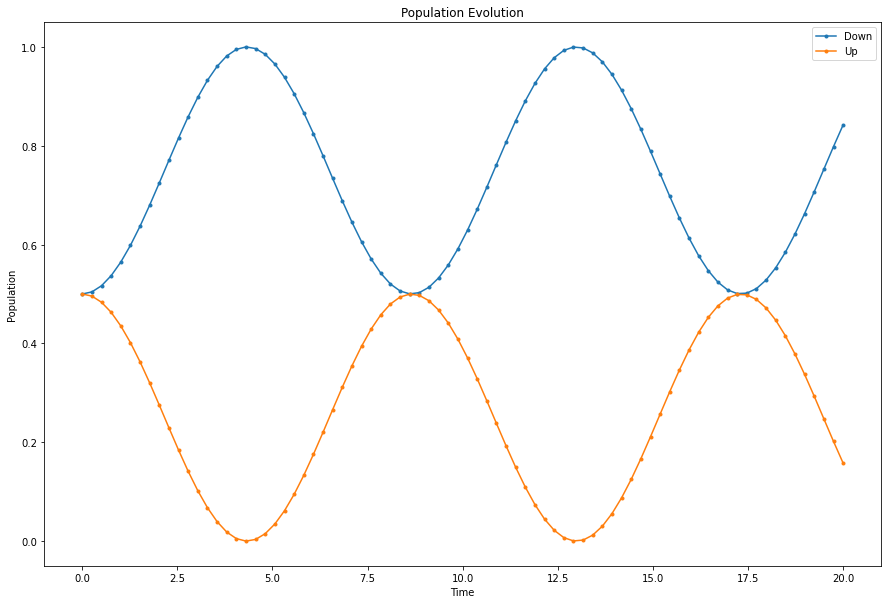

In [9]:
#Considering the pulse for Blue sideband
import cmath
Ohm_n_plus_n = 100
ohm = 0.1
#Treat 20MHz as reference
Nstates = 3
internal = np.sqrt(1/2) * basis(2, 0) + np.sqrt(1/2) * basis(2, 1)
oscillation = basis(Nstates, 0)
psi0 = tensor(internal, oscillation)

'''Sigma-Z, sigmaz(). Sigma plus, sigmap(). Sigma minus, sigmam()'''
a = tensor(qeye(2), destroy(Nstates))
a_dagger = tensor(qeye(2), create(Nstates))
sigmaZ = tensor(sigmaz(), qeye(Nstates))
sigmaP = tensor(sigmap(), qeye(Nstates))
sigmaM = tensor(sigmam(), qeye(Nstates))

H_0 = 2*np.pi*(a_dagger * a) + 0.5*2*np.pi*(sigmaZ)
H_blue = 0.5*Ohm_n_plus_n*(a_dagger * sigmaP - a * sigmaM)*cmath.sqrt(-1)
H = [H_blue]
tg = 20
t_list = np.linspace(0, tg, 80)
output = mesolve(H, psi0, t_list, [])

ground = tensor(qeye(2), basis(Nstates, 0))
excited = tensor(qeye(2), basis(Nstates, 1))
leakage = tensor(qeye(2), basis(Nstates, 2))

state0 = ground * ground.dag()
state1 = excited * excited.dag()
state2 = leakage * leakage.dag()
result0 = expect(state0, output.states)
result1 = expect(state1, output.states)
result2 = expect(state2, output.states)
plt.figure(figsize=(15,10))
plt.plot(t_list,result0,marker = '.',label = 'Ground')
plt.plot(t_list,result1,marker = '.',label = 'Excited')
plt.plot(t_list,result2,marker = '.',label = 'Leakage')
plt.title('Blue Side-band Pulse')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
print(output.states[0])
print(output.states[-1])

ground = tensor(basis(2, 0), qeye(Nstates))
excited = tensor(basis(2, 1), qeye(Nstates))

state0 = ground * ground.dag()
state1 = excited * excited.dag()
result0 = expect(state0, output.states)
result1 = expect(state1, output.states)
plt.figure(figsize=(15,10))
plt.plot(t_list,result0,marker = '.',label = 'Down')
plt.plot(t_list,result1,marker = '.',label = 'Up')
plt.title('Population Evolution')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
print(output.states[0])
print(output.states[-1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


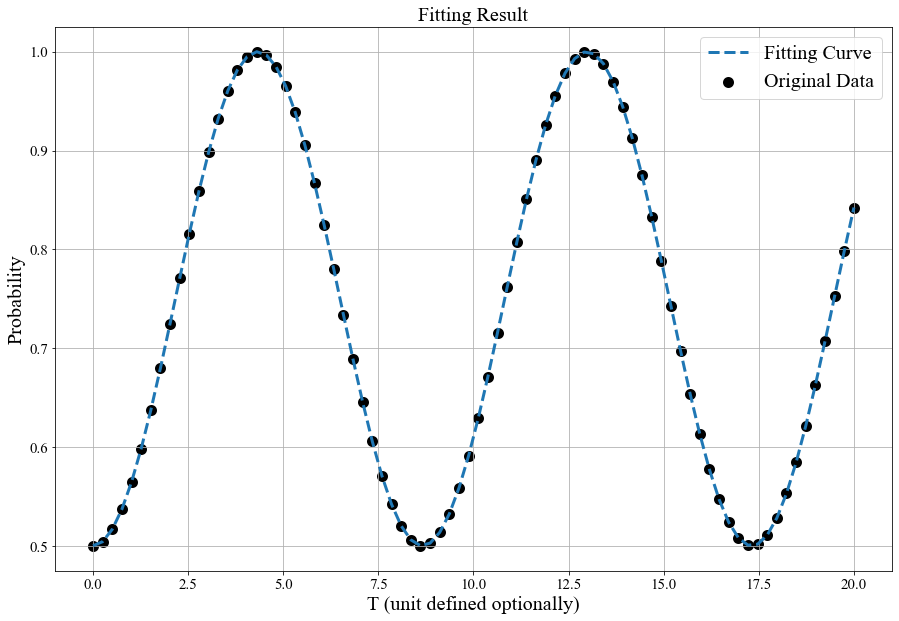

In [10]:
'''Note: this fitting is quite sensitive to initial values'''
par0 = np.array([0.25,3,0.8,3.8])
par, cov = fitter.curve_fit(fitting_sin, t_list, result0, par0)
fit_y = fitting_sin(t_list, *par)

plt.figure(figsize = (15, 10))
plt.rc('font',family='Times New Roman')
plt.plot(t_list, fit_y, 'C0--', lw=3)
plt.scatter(t_list, result0, color='k', marker='o', linewidths = 5)
#plt.errorbar(X, Y, marker="o", lw=0, yerr=np.sqrt(Y * (1 - Y)) / 10, elinewidth=1, color="k")
#plt.xlim(0, 100)
#plt.ylim(0, 100)
plt.title('Fitting Result', fontdict={'family' : 'Times New Roman', 'size':20})
plt.xlabel('T (unit defined optionally)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.ylabel('Probability', fontdict={'family' : 'Times New Roman', 'size':20})
plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=15)
plt.legend(("Fitting Curve", "Original Data"), fontsize=20)
plt.grid()
plt.show()

In [11]:
T = 2 * np.pi / par[2]
print(output.states[17])

Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70713704]
 [0.70704744]
 [0.        ]
 [0.00641232]
 [0.        ]
 [0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


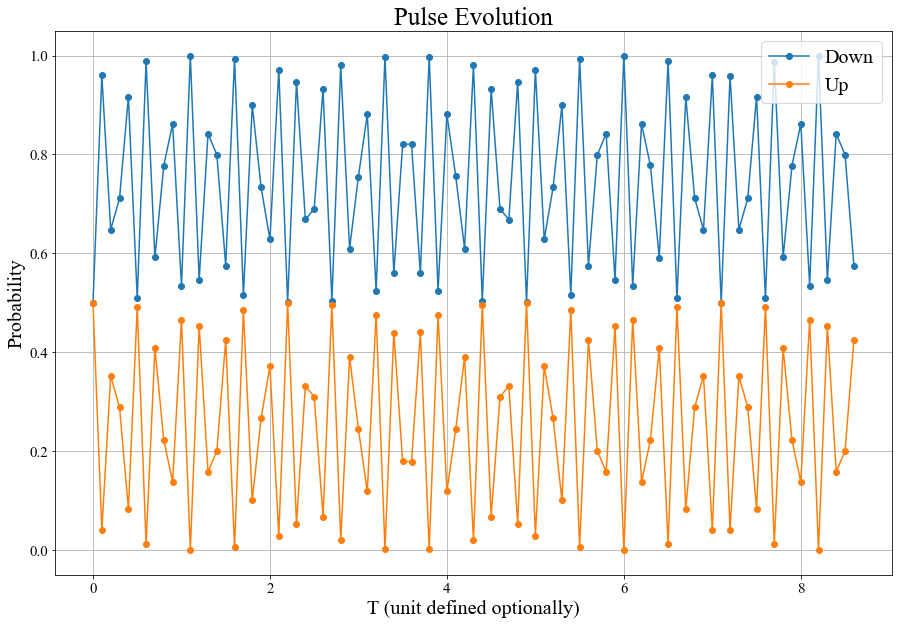

Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[ 0.70713752]
 [ 0.27391084]
 [ 0.        ]
 [-0.65186607]
 [ 0.        ]
 [ 0.        ]]


In [12]:
#Pi Pulse for Blue sideband
import cmath
Ohm_n_plus_n = 100
ohm = 0.1
#Treat 20MHz as reference
Nstates = 3
internal = np.sqrt(1/2) * basis(2, 0) + np.sqrt(1/2) * basis(2, 1)
oscillation = basis(Nstates, 0)
psi0 = tensor(internal, oscillation)

'''Sigma-Z, sigmaz(). Sigma plus, sigmap(). Sigma minus, sigmam()'''
a = tensor(qeye(2), destroy(Nstates))
a_dagger = tensor(qeye(2), create(Nstates))
sigmaZ = tensor(sigmaz(), qeye(Nstates))
sigmaP = tensor(sigmap(), qeye(Nstates))
sigmaM = tensor(sigmam(), qeye(Nstates))

H_0 = 2*np.pi*(a_dagger * a) + 0.5*2*np.pi*(sigmaZ)
H_blue = 0.5*Ohm_n_plus_n*(a_dagger * sigmaP - a * sigmaM)*cmath.sqrt(-1)
H = [H_blue]
tg = T
t_list = np.arange(0, tg, 0.1)
output = mesolve(H, psi0, t_list, [])

ground = tensor(basis(2, 0), qeye(Nstates))
excited = tensor(basis(2, 1), qeye(Nstates))

state0 = ground * ground.dag()
state1 = excited * excited.dag()
result0 = expect(state0, output.states)
result1 = expect(state1, output.states)
plt.figure(figsize = (15, 10))
plt.rc('font',family='Times New Roman')
plt.plot(t_list,result0,marker = 'o',label='Down')
plt.plot(t_list,result1,marker = 'o',label='Up')
plt.title('Pulse Evolution', fontdict={'family' : 'Times New Roman', 'size':25})
plt.xlabel('T (unit defined optionally)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.ylabel('Probability', fontdict={'family' : 'Times New Roman', 'size':20})
plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=15)
plt.legend(("Down", "Up"), fontsize=20)
plt.grid()
plt.show()
print(output.states[0])
print(output.states[-1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


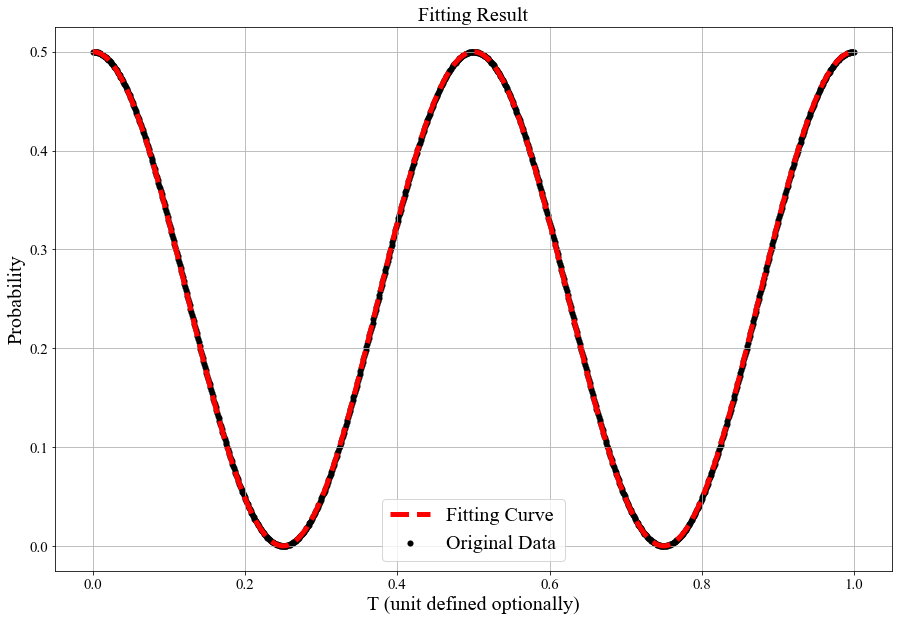

In [13]:
#Considering the pulse for Blue sideband
import cmath
Ohm_n_plus_n = 100
ohm = 0.1
#Treat 20MHz as reference
Nstates = 3
internal = np.sqrt(1/2) * basis(2, 0) + np.sqrt(1/2) * basis(2, 1)
oscillation = basis(Nstates, 0)
psi0 = tensor(internal, oscillation)

'''Sigma-Z, sigmaz(). Sigma plus, sigmap(). Sigma minus, sigmam()'''
a = tensor(qeye(2), destroy(Nstates))
a_dagger = tensor(qeye(2), create(Nstates))
sigmaZ = tensor(sigmaz(), qeye(Nstates))
sigmaP = tensor(sigmap(), qeye(Nstates))
sigmaM = tensor(sigmam(), qeye(Nstates))

H_0 = 2*np.pi*(a_dagger * a) + 0.5*2*np.pi*(sigmaZ)
H_blue = 2*np.pi*(a * sigmaP - a_dagger * sigmaM)*1j
H_red = 0.5*Ohm_n_plus_n*(a_dagger * sigmaP - a * sigmaM)*1j
H = 2 * np.pi * (tensor(sigmap(), create(Nstates)) + tensor(sigmam(), destroy(Nstates)))
H = H_blue
tg = 1
t_list = np.linspace(0, tg, 1000)
output = mesolve(H, psi0, t_list, [])

ground = tensor(basis(2, 0), qeye(Nstates))
excited = tensor(basis(2, 1), qeye(Nstates))

state0 = ground * ground.dag()
state1 = excited * excited.dag()
result0 = expect(state0, output.states)
result1 = expect(state1, output.states)

'''Note: this fitting is quite sensitive to initial values'''
par0 = np.array([0.25,1,12,8])
par, cov = fitter.curve_fit(fitting_sin, t_list, result0, par0)
fit_y = fitting_sin(t_list, *par)

plt.figure(figsize = (15, 10))
plt.rc('font',family='Times New Roman')
plt.plot(t_list, fit_y, 'r--', lw=5)
plt.scatter(t_list, result0, color='k', marker='o', linewidths = 0.1)
#plt.errorbar(X, Y, marker="o", lw=0, yerr=np.sqrt(Y * (1 - Y)) / 10, elinewidth=1, color="k")
#plt.xlim(0, 100)
#plt.ylim(0, 100)
plt.title('Fitting Result', fontdict={'family' : 'Times New Roman', 'size':20})
plt.xlabel('T (unit defined optionally)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.ylabel('Probability', fontdict={'family' : 'Times New Roman', 'size':20})
plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=15)
plt.legend(("Fitting Curve", "Original Data"), fontsize=20)
plt.grid()
plt.show()

In [14]:
T = 2 * np.pi / par[2]
print(T)

0.5000002981796713


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


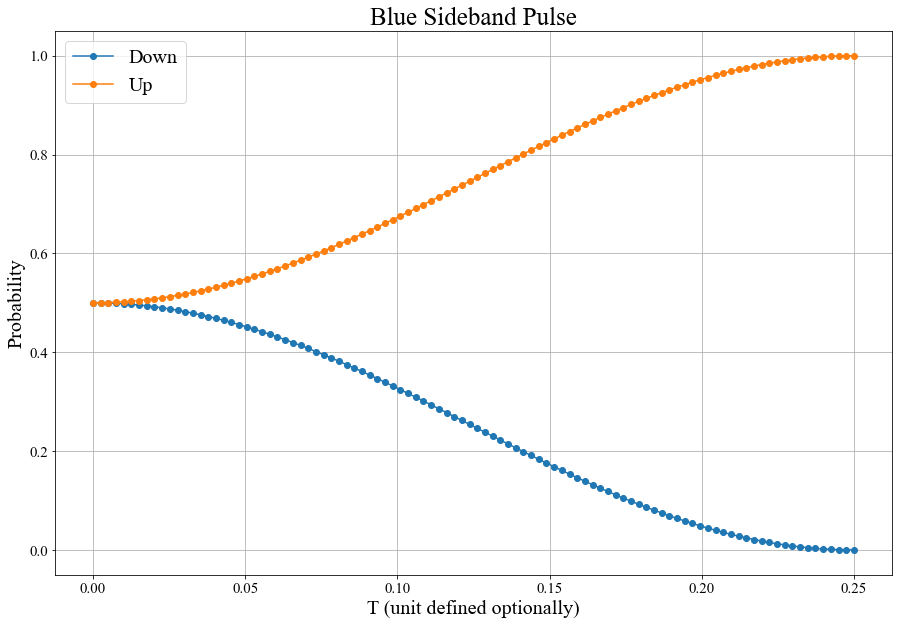

Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]]
[[0.+0.j]]


In [15]:
#Considering the pulse for Blue sideband
import cmath
Ohm_n_plus_n = 100
ohm = 0.1
#Treat 20MHz as reference
Nstates = 3
internal = np.sqrt(1/2) * basis(2, 0) + np.sqrt(1/2) * basis(2, 1)
oscillation = basis(Nstates, 0)
psi0 = tensor(internal, oscillation)

'''Sigma-Z, sigmaz(). Sigma plus, sigmap(). Sigma minus, sigmam()'''
a = tensor(qeye(2), destroy(Nstates))
a_dagger = tensor(qeye(2), create(Nstates))
sigmaZ = tensor(sigmaz(), qeye(Nstates))
sigmaP = tensor(sigmap(), qeye(Nstates))
sigmaM = tensor(sigmam(), qeye(Nstates))

H_0 = 2*np.pi*(a_dagger * a) + 0.5*2*np.pi*(sigmaZ)
H_blue = 2*np.pi*(a * sigmaP - a_dagger * sigmaM)*1j
H_red = 0.5*Ohm_n_plus_n*(a_dagger * sigmaP - a * sigmaM)*1j
H = 2 * np.pi * (tensor(sigmap(), create(Nstates)) + tensor(sigmam(), destroy(Nstates)))
H = H_blue
tg = T/2
t_list = np.linspace(0, tg, 100)
output = mesolve(H, psi0, t_list, [])

ground = tensor(basis(2, 0), qeye(Nstates))
excited = tensor(basis(2, 1), qeye(Nstates))

state0 = ground * ground.dag()
state1 = excited * excited.dag()
result0 = expect(state0, output.states)
result1 = expect(state1, output.states)
plt.figure(figsize = (15, 10))
plt.rc('font',family='Times New Roman')
plt.plot(t_list,result0,marker='o',label='Down')
plt.plot(t_list,result1,marker='o',label='Up')
plt.title('Blue Sideband Pulse', fontdict={'family' : 'Times New Roman', 'size':25})
plt.xlabel('T (unit defined optionally)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.ylabel('Probability', fontdict={'family' : 'Times New Roman', 'size':20})
plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=15)
plt.legend(("Down", "Up"), fontsize=20)
plt.grid()
plt.show()
print(output.states[0])
print(output.states[-1][1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


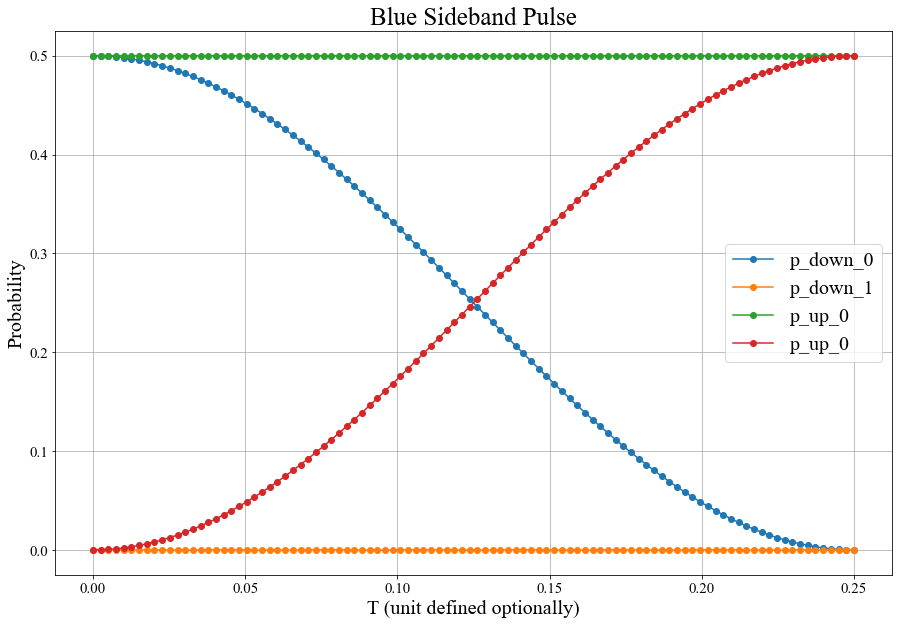

Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[ 9.31896598e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.07117194e-01]
 [-7.07096368e-01]
 [ 0.00000000e+00]]


In [16]:
p_down_0 = []
p_down_1 = []
p_up_0 = []
p_up_1 = []
for i in range(len(t_list)):
    #print(float(abs(output.states[0][0])))
    #print((output.states[i][1]))
    p_down_0.append(float(abs(output.states[i][0]))**2)
    p_down_1.append(float(abs(output.states[i][1]))**2)
    p_up_0.append(float(abs(output.states[i][3]))**2)
    p_up_1.append(float(abs(output.states[i][4]))**2)
    
plt.figure(figsize = (15, 10))
plt.rc('font',family='Times New Roman')
plt.plot(t_list,p_down_0,marker='o',label='p_down_0')
plt.plot(t_list,p_down_1,marker='o',label='p_down_1')
plt.plot(t_list,p_up_0,marker='o',label='p_up_0')
plt.plot(t_list,p_up_1,marker='o',label='p_up_1')
plt.title('Blue Sideband Pulse', fontdict={'family' : 'Times New Roman', 'size':25})
plt.xlabel('T (unit defined optionally)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.ylabel('Probability', fontdict={'family' : 'Times New Roman', 'size':20})
plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=15)
plt.legend(("p_down_0", "p_down_1", 'p_up_0', 'p_up_0'), fontsize=20)
plt.grid()
plt.show()
print(output.states[0])
print(output.states[-1])

In [17]:
#Assuming the pulse for Blue sideband is ideal
import cmath
Ohm_n_plus_n = 100
ohm = 0.1
#Treat 20MHz as reference
Nstates = 10
internal = basis(2, 1)
oscillation = np.sqrt(1/2) * basis(Nstates, 0) + np.sqrt(1/2) * basis(Nstates, 1)
psi0 = tensor(internal, oscillation)
rho = psi0 * psi0.dag()
#print(rho)

'''Sigma-Z, sigmaz(). Sigma plus, sigmap(). Sigma minus, sigmam()'''
a = tensor(qeye(2), destroy(Nstates))
a_dagger = tensor(qeye(2), create(Nstates))
sigmaZ = tensor(sigmaz(), qeye(Nstates))
sigmaP = tensor(sigmap(), qeye(Nstates))
sigmaM = tensor(sigmam(), qeye(Nstates))

H_0 = 2*np.pi*(a_dagger * a) + 0.5*2*np.pi*(sigmaZ)
H_blue = 0.5*Ohm_n_plus_n*(a * sigmaP - a_dagger * sigmaM)*1j
H_red = 0.5*Ohm_n_plus_n*(a_dagger * sigmaP - a * sigmaM)*1j

H = [H_0]
t_wait = 20
t_wait_list = np.linspace(0, t_wait, 80)
#result = mesolve(H, initial, tlist, [np.sqrt(0.1)*a], [a.dag()*a, sm.dag()*sm])
output_wait = mesolve(H, rho, t_wait_list, [np.sqrt(0.1)*a])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
import matplotlib
matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 20,
         "xtick.direction": "in",
         "xtick.major.pad": 8,
         "xtick.top": True,
         "ytick.labelsize": 20,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 20,
         "axes.labelpad": 10,
         "axes.grid": True
    }
)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
